In [1]:
import pandas as pd
import plotly.express as px
import os 


In [2]:
test_parquet=os.path.join(os.getcwd(), 'data', 'asl-signs', 'train_landmark_files','37055', "1003109377.parquet") #this is on the dataset
df= pd.read_parquet(test_parquet) #this is on the dataset

In [3]:
df.head()

,frame,row_id,type,landmark_index,x,y,z
0,14,14-face-0,face,0,0.432380,0.375417,-0.044000
1,14,14-face-1,face,1,0.437980,0.349091,-0.070176
2,14,14-face-2,face,2,0.429624,0.360922,-0.040331
3,14,14-face-3,face,3,0.430260,0.315678,-0.049688
4,14,14-face-4,face,4,0.441155,0.338613,-0.073218


In [4]:
df.columns

Index(['frame', 'row_id', 'type', 'landmark_index', 'x', 'y', 'z'], dtype='object')

In [5]:
df

,frame,row_id,type,landmark_index,x,y,z
0,14,14-face-0,face,0,0.432380,0.375417,-0.044000
1,14,14-face-1,face,1,0.437980,0.349091,-0.070176
2,14,14-face-2,face,2,0.429624,0.360922,-0.040331
3,14,14-face-3,face,3,0.430260,0.315678,-0.049688
4,14,14-face-4,face,4,0.441155,0.338613,-0.073218
...,...,...,...,...,...,...,...
12484,36,36-right_hand-16,right_hand,16,NaN,NaN,NaN
12485,36,36-right_hand-17,right_hand,17,NaN,NaN,NaN
12486,36,36-right_hand-18,right_hand,18,NaN,NaN,NaN
12487,36,36-right_hand-19,right_hand,19,NaN,NaN,NaN


In [6]:
px.scatter_3d(df, x="x", y="y", z="z", color="type" , opacity=0.5, width=800, height=800).show() #dataset

In [7]:
df2=pd.read_parquet("2d_landmarks.parquet") #rgb image landmarks
df2.columns

Index(['type', 'landmark_index', 'x', 'y', 'z', 'frame'], dtype='object')

In [8]:
df2

,type,landmark_index,x,y,z,frame
0,face,0,0.348458,0.314622,-0.018304,1
1,face,1,0.336414,0.286611,-0.027226,1
2,face,2,0.347493,0.294592,-0.015413,1
3,face,3,0.335894,0.262787,-0.014786,1
4,face,4,0.334559,0.278880,-0.028495,1
...,...,...,...,...,...,...
7054,right_hand,16,0.028863,0.857062,-0.087274,13
7055,right_hand,17,0.123782,0.802808,-0.024694,13
7056,right_hand,18,0.087178,0.812775,-0.040275,13
7057,right_hand,19,0.063736,0.830325,-0.050603,13


In [9]:
df2['z'].unique()

array([-0.01830381, -0.02722551, -0.01541283, ..., -0.04027536,
       -0.05060297, -0.05750386])

In [10]:
px.scatter_3d(df2, x="x", y="y", z="z", color="type" , opacity=0.5, width=800, height=800).show() #rgb image landmarks

In [11]:
df3= pd.read_parquet("3d_landmarks.parquet") #rgb image landmarks

In [12]:
df3

,frame,type,landmark_index,x,y,z
0,1,face,0,0.379298,0.306697,2.127
1,1,face,1,0.370250,0.276935,2.093
2,1,face,2,0.378565,0.286010,2.127
3,1,face,3,0.370162,0.250566,2.078
4,1,face,4,0.369202,0.268435,2.085
...,...,...,...,...,...,...
4882,9,right_hand,16,0.041194,0.853596,0.681
4883,9,right_hand,17,0.129775,0.797937,1.947
4884,9,right_hand,18,0.099014,0.808255,NaN
4885,9,right_hand,19,0.078800,0.824212,0.726


In [13]:
df3.columns

Index(['frame', 'type', 'landmark_index', 'x', 'y', 'z'], dtype='object')

In [14]:
px.scatter_3d(df3, x="x", y="y", z="z", color="type" , opacity=0.5, width=800, height=800).show()

In [15]:
print(df.shape, df2.shape, df3.shape)

(12489, 7) (7059, 6) (4887, 6)


✅  saved annotated_image_0.png


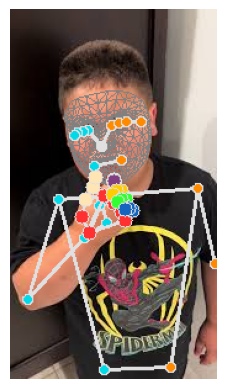

In [ ]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

#pathing inits
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__)) 
except NameError:
    BASE_DIR = os.getcwd()  
OUTPUT_DIR = os.path.join(BASE_DIR, "tmp")
os.makedirs(OUTPUT_DIR, exist_ok=True)

IMAGE_FILES = [
    os.path.join(BASE_DIR, "test_mediapipe.jpg"),
    # add more images here
]

#mediapipe inits
mp_drawing        = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh      = mp.solutions.face_mesh
mp_pose           = mp.solutions.pose
mp_hands          = mp.solutions.hands

landmarks_data = {}

#annotation loop
with mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True) as face_mesh, \
     mp_pose.Pose(static_image_mode=True)                                   as pose, \
     mp_hands.Hands(static_image_mode=True)                                as hands:

    for idx, img_path in enumerate(IMAGE_FILES):
        image = cv2.imread(img_path)
        if image is None:
            print(f"Couldn’t load {img_path}")
            continue

        h, w, _ = image.shape
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_rgb.flags.writeable = False

        face_res  = face_mesh.process(img_rgb)
        pose_res  = pose.process(img_rgb)
        hands_res = hands.process(img_rgb)
        img_rgb.flags.writeable = True

        annotated = image.copy()
        key = os.path.basename(img_path)
        landmarks_data[key] = {"face_landmarks": [], "pose_landmarks": [], "hand_landmarks": []}

        # face
        if face_res.multi_face_landmarks:
            for lm in face_res.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    annotated, lm,
                    mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style(),
                )
                landmarks_data[key]["face_landmarks"].append(
                    [(p.x * w, p.y * h, p.z * w) for p in lm.landmark]
                )

        # pose
        if pose_res.pose_landmarks:
            mp_drawing.draw_landmarks(
                annotated, pose_res.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style(),
            )
            landmarks_data[key]["pose_landmarks"] = [
                (p.x * w, p.y * h, p.z * w) for p in pose_res.pose_landmarks.landmark
            ]

        # hands
        if hands_res.multi_hand_landmarks:
            for lm in hands_res.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    annotated, lm,
                    mp_hands.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style(),
                )
                landmarks_data[key]["hand_landmarks"].append(
                    [(p.x * w, p.y * h, p.z * w) for p in lm.landmark]
                )

        out_path = os.path.join(OUTPUT_DIR, f"annotated_image_{idx}.png")
        cv2.imwrite(out_path, annotated)
        print(f"Saved {os.path.basename(out_path)}")

#running the preview to see plottings
first_out = os.path.join(OUTPUT_DIR, "annotated_image_0.png")
if os.path.exists(first_out):
    plt.imshow(plt.imread(first_out))
    plt.axis("off")
    plt.show()
